# 🌳 ForestGroot YOLO

## Integrantes:
- **Juan Camilo Vargas**
- **Samuel Pinzón Valderrutén**
- **Sebastian Diaz Noguera**

![ForestGroot](https://i.ibb.co/WzNPDXN/Sin-t-tulo.png)


## **Preparación del entorno de trabajo**

Antes de entrenar el modelo YOLO (You Only Look Once), fue crucial configurar el entorno de trabajo. Esto implicó la instalación de dos librerías clave:

- **[Ultralytics](https://github.com/ultralytics/ultralytics)**: Ofreció implementaciones optimizadas de YOLO, reconocidas por su eficiencia y compatibilidad con PyTorch. Se siguieron las instrucciones en su repositorio de GitHub para la instalación.

- **[Roboflow](https://roboflow.com/)**: Simplificó la preparación de datos para visión por computadora, incluyendo la detección de objetos. Se utilizó para recopilar, etiquetar y preprocesar conjuntos de datos.


**Descarga de las Librerías**

In [ ]:
# Instalación de paquetes necesarios
!pip install ultralytics -q
!pip install roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 949.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
# Importación de librerías
import glob
import os

from IPython.display import display, Image
from roboflow import Roboflow
import tensorflow as tf
from ultralytics import YOLO

Con estas librerías instaladas y configuradas correctamente, se pudo proceder con el entrenamiento del modelo YOLO.

**Entorno de Trabajo**


Es importante asegurarse de contar con acceso a una unidad de procesamiento gráfico (GPU) para garantizar un rendimiento óptimo durante el proceso.

In [ ]:
# Verificar si se encuentra disponible la GPU
device_name = tf.test.gpu_device_name()
# Si no se encuentra disponible la GPU, lanzar una excepción
if device_name != '/device:GPU:0':
    raise SystemError('No se encontró dispositivo GPU')
# Imprimir el nombre del dispositivo GPU encontrado
print('Dispositivo GPU encontrado en: {}'.format(device_name))

Dispositivo GPU encontrado en: /device:GPU:0


In [ ]:
# Define el directorio de trabajo actual
HOME = os.getcwd()
HOME

'/content'

## **Dataset desde Roboflow**

Como se mencionó anteriormente, se utilizó la herramienta de Roboflow para la creación del dataset. Para acceder al dataset, se puede utilizar la API de la siguiente manera. En caso de que no puedas acceder a la API, también puedes descomprimir el archivo con el dataset que se encuentra en el repositorio.



In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Descargar el conjunto de datos de Roboflow utilizando la API de Roboflow
rf = Roboflow(api_key="w2EZPylLkOYJSnI4o6qN")
project = rf.workspace("test-yyciu").project("groot-v2")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.22, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Groot-V2-3 in yolov8:: 100%|██████████| 3996/3996 [00:01<00:00, 3124.19it/s]


**Modificación del Archivo data.yaml**

Es necesario realizar un cambio en las rutas especificadas en el archivo `/content/datasets/Groot-V2-3/data.yaml` para asegurar que los datos se apunten a las ubicaciones correctas. El archivo modificado debería verse así:

```yaml
test: ../test/images
train: ../train/images
val: ../valid/images



## **Entrenamiento**
Para el entrenamiento del modelo, se utilizó la biblioteca de Ultralytics. Inicialmente, se carga un modelo preentrenado y luego se procede a entrenarlo con nuestras propias imágenes. Es importante destacar que YOLOv8 cuenta con varios modelos preentrenados específicamente diseñados para la tarea de segmentación, incluyendo yolov8n-seg.pt, yolov8s-seg.pt, yolov8m-seg.pt, yolov8l-seg.pt y yolov8x-seg.pt. Además, recientemente se ha introducido YOLOv9 para segmentación, con modelos como yolo9c-seg.pt y yolov9e-seg.pt


**Parametros de Entrenamiento**

En el entrenamiento de YOLO, se lleva a cabo un proceso de fine-tuning en conjuntos de datos personalizados o preexistentes. A continuación, se detallan los parámetros utilizados para configurar y ajustar este proceso:

| Parámetro | Descripción                                                                                                                                                           | Valor Asignado |
|-----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------|
| data      | Ruta al archivo de configuración del conjunto de datos. Este archivo contiene detalles como las rutas de los datos de entrenamiento y validación. | `{dataset.location}/data.yaml` |
| epochs    | Número total de épocas de entrenamiento. Ajustar este valor puede afectar la duración del entrenamiento y el rendimiento del modelo.                                   | `70`           |
| plots     | Genera y guarda gráficos de métricas de entrenamiento y validación, así como ejemplos de predicciones, proporcionando información visual sobre el rendimiento del modelo.| `True`         |
| imgsz     | Tamaño objetivo de las imágenes para el entrenamiento. Todas las imágenes se redimensionan a esta dimensión antes de alimentar al modelo.                               | `640`          |



La siguiente celda de código realiza el entrenamiento utilizando estos parámetros:

In [ ]:
%cd {HOME}

# Configuración y entrenamiento del modelo YOLO
model = YOLO("yolov8n-seg.pt")  # Cargar el modelo preentrenado
model.train(data=f"{dataset.location}/data.yaml", epochs=70, imgsz=640, plots=True)

/content


100%|██████████| 6.73M/6.73M [00:00<00:00, 84.1MB/s]


Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/datasets/Groot-V2-3/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1   1004860  ultralytics.nn.modules.head.Segment          [4, 32, 64, [64, 128, 256]]   
YOLOv8n-seg summary: 261 layers, 3264396 parameters, 3264380 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 67.3MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/datasets/Groot-V2-3/train/labels... 1743 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1743/1743 [00:01<00:00, 1509.61it/s]

train: WARNING ⚠️ /content/datasets/Groot-V2-3/train/images/HtXsDvUZ11_png.rf.4bc944e229be51cd5f1810d1c2277f24.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Groot-V2-3/train/images/HtXsDvUZ11_png.rf.78525aaaa7a646129ee28c92cb6146fb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Groot-V2-3/train/images/HtXsDvUZ11_png.rf.b1d9a71a74c5abab79a7a4b783ce1c8f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Groot-V2-3/train/images/Water_original_JAHkqXoZSS-png_6236bc46-afc0-4d5e-a058-46a87f94adc9_png.rf.0705f451c2574abd3ef55ba3f6c06810.jpg: 1 duplicate labels removed


train: New cache created: /content/datasets/Groot-V2-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/Groot-V2-3/valid/labels... 166 images, 1 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<00:00, 835.00it/s]

val: New cache created: /content/datasets/Groot-V2-3/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/70      3.07G      1.081      2.412      2.549      1.343         63        640: 100%|██████████| 109/109 [01:10<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        166        415      0.413      0.386      0.349      0.223      0.467      0.382      0.364      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/70       2.8G      1.051      1.874      1.764      1.289         53        640: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]


                   all        166        415      0.498      0.475       0.47      0.301      0.524       0.49      0.484      0.289

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.86G      1.056       1.79      1.624      1.295         75        640: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        166        415       0.52       0.42       0.43      0.266      0.539      0.427      0.433       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.74G      1.022      1.776      1.526       1.28         61        640: 100%|██████████| 109/109 [01:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]


                   all        166        415      0.564      0.538      0.542      0.345       0.58      0.552      0.558      0.332

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/70       2.8G      1.018      1.741      1.389      1.276         88        640: 100%|██████████| 109/109 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]


                   all        166        415      0.565      0.641      0.623      0.414      0.577      0.626      0.608       0.39

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.74G     0.9841      1.668      1.288      1.246         62        640: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        166        415      0.527      0.612      0.555      0.349      0.545      0.616      0.566      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.85G     0.9483      1.627      1.262       1.23         77        640: 100%|██████████| 109/109 [01:00<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]


                   all        166        415      0.599      0.636      0.651      0.435      0.613      0.649      0.669      0.429

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.88G     0.9154      1.613      1.227      1.211         63        640: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        166        415      0.631      0.659      0.663      0.439      0.596      0.692      0.664      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.84G      0.924      1.589      1.184      1.218        114        640: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


                   all        166        415      0.567      0.645      0.631       0.44      0.691      0.566      0.637      0.425

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.74G     0.9267      1.595      1.151      1.209         76        640: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]


                   all        166        415      0.641      0.631      0.666      0.438      0.648      0.629      0.656      0.421

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.88G     0.8959      1.536      1.115      1.196         62        640: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        166        415      0.696      0.704      0.725      0.484      0.688      0.681      0.719      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.75G     0.8874      1.575      1.091      1.196         69        640: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        166        415      0.678      0.638      0.677      0.465      0.678      0.654      0.678      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.86G     0.8657      1.538      1.058      1.177         67        640: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        166        415      0.715      0.655      0.724      0.507      0.732      0.668       0.73      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.77G     0.8449      1.473      1.034      1.173         82        640: 100%|██████████| 109/109 [00:56<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        166        415      0.713      0.627      0.713      0.495      0.708      0.644      0.708      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.83G     0.8333      1.452      1.007      1.162         72        640: 100%|██████████| 109/109 [00:56<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        166        415      0.672        0.7      0.713      0.516       0.69      0.703      0.724      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.85G     0.8383        1.5     0.9932      1.164         58        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        166        415      0.697      0.676      0.711      0.509      0.728       0.67      0.712      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.76G     0.8126      1.446     0.9685      1.146         76        640: 100%|██████████| 109/109 [00:55<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        166        415      0.718      0.709      0.726      0.515      0.731      0.688      0.724       0.49

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.75G     0.8135      1.435     0.9537      1.151         68        640: 100%|██████████| 109/109 [00:56<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]


                   all        166        415      0.686      0.688      0.726      0.508       0.69       0.69      0.723      0.485

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.85G      0.809      1.422     0.9603      1.149         67        640: 100%|██████████| 109/109 [00:56<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        166        415      0.672      0.697      0.712       0.51      0.693      0.684      0.716      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.86G     0.7844      1.362     0.9221      1.133         82        640: 100%|██████████| 109/109 [00:55<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        166        415      0.738       0.66      0.728      0.518       0.74      0.678      0.732      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.76G     0.7843       1.35     0.8874      1.129         62        640: 100%|██████████| 109/109 [00:55<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        166        415      0.748      0.649      0.705      0.506      0.736       0.66      0.704      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.73G     0.7634      1.335     0.8876      1.123         67        640: 100%|██████████| 109/109 [00:55<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.09it/s]

                   all        166        415      0.711      0.676      0.709       0.51       0.72        0.7      0.721      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.85G     0.7789      1.389     0.8863      1.132         90        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        166        415      0.793      0.692      0.768      0.562      0.806      0.699      0.763      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.87G     0.7771      1.383      0.882      1.139         74        640: 100%|██████████| 109/109 [00:55<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        166        415      0.715      0.677       0.73      0.539       0.73      0.676      0.731      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.75G     0.7755      1.361     0.8671      1.124         66        640: 100%|██████████| 109/109 [00:56<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        166        415      0.747      0.675      0.732      0.535      0.734       0.69       0.74      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.76G     0.7714      1.352     0.8613      1.121         52        640: 100%|██████████| 109/109 [00:55<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]


                   all        166        415      0.836      0.635       0.75      0.542      0.836      0.635      0.742       0.53

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.77G     0.7555      1.321     0.8334       1.11         78        640: 100%|██████████| 109/109 [00:57<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        166        415      0.749      0.707      0.753       0.56      0.755      0.698      0.744      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.88G      0.752      1.333     0.8413      1.119         52        640: 100%|██████████| 109/109 [00:55<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        166        415      0.777      0.687      0.751       0.56      0.793      0.668      0.745      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.89G     0.7333      1.334     0.8013      1.099         67        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]


                   all        166        415      0.778      0.704      0.771      0.577      0.779      0.727      0.775      0.562

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.85G     0.7244       1.28     0.7767      1.096         89        640: 100%|██████████| 109/109 [00:57<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        166        415      0.742      0.702      0.766      0.573      0.735      0.718      0.768      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.77G       0.73      1.276     0.7981      1.094         59        640: 100%|██████████| 109/109 [00:56<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        166        415      0.773      0.671      0.739      0.552      0.754      0.686      0.735      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.77G     0.7151      1.248       0.77      1.088         74        640: 100%|██████████| 109/109 [00:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        166        415      0.709      0.732       0.75       0.56      0.733      0.722      0.755      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.74G     0.7226      1.283     0.7849      1.094         66        640: 100%|██████████| 109/109 [00:56<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        166        415      0.738      0.717      0.755      0.567      0.737      0.714      0.751      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.84G     0.7189      1.255     0.7685      1.097         72        640: 100%|██████████| 109/109 [00:56<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        166        415      0.737      0.686      0.746      0.561      0.743       0.69      0.741      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.72G     0.7061      1.286      0.762       1.09         52        640: 100%|██████████| 109/109 [00:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        166        415        0.8      0.655      0.749      0.569      0.727      0.723      0.755      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.81G     0.6986      1.259     0.7496      1.081         64        640: 100%|██████████| 109/109 [00:55<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        166        415       0.73      0.727      0.769      0.578      0.756      0.703      0.776      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.72G     0.6989      1.228      0.739       1.08         84        640: 100%|██████████| 109/109 [00:54<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        166        415      0.775      0.683      0.758      0.571      0.767      0.695      0.761       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.89G     0.6917      1.242     0.7367      1.081         56        640: 100%|██████████| 109/109 [00:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]

                   all        166        415      0.722      0.709       0.75      0.575      0.714      0.723      0.752      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.77G     0.6934      1.249     0.7287      1.078         60        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        166        415      0.781      0.684      0.769       0.58      0.775      0.693      0.771      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.83G     0.6674      1.211     0.6963      1.055         58        640: 100%|██████████| 109/109 [00:56<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        166        415      0.795      0.685      0.778      0.596      0.811      0.671      0.773       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.81G     0.6702      1.205     0.6965      1.065         56        640: 100%|██████████| 109/109 [00:56<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        166        415      0.776      0.686      0.757       0.58      0.782      0.688      0.761      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.79G     0.6966      1.248     0.7125      1.075         79        640: 100%|██████████| 109/109 [00:55<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        166        415      0.711      0.742      0.756      0.578      0.738      0.746      0.766      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.84G     0.6759      1.212     0.6983      1.067         74        640: 100%|██████████| 109/109 [00:56<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        166        415      0.754      0.704      0.752      0.557      0.761      0.707      0.756      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.84G     0.6653      1.197        0.7      1.063         50        640: 100%|██████████| 109/109 [00:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        166        415      0.699       0.71      0.726      0.554      0.715       0.72      0.734      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.84G     0.6622      1.178     0.6654      1.062         64        640: 100%|██████████| 109/109 [00:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        166        415      0.771      0.697      0.751      0.574      0.775      0.704      0.763      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.89G     0.6552      1.176     0.6752      1.057         54        640: 100%|██████████| 109/109 [00:53<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        166        415      0.759      0.702       0.74      0.576       0.79      0.691      0.747      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.76G     0.6558      1.169     0.6775      1.062         61        640: 100%|██████████| 109/109 [00:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]


                   all        166        415      0.743      0.712       0.75      0.574      0.755      0.721      0.763      0.547

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.87G     0.6437      1.149     0.6571       1.06         54        640: 100%|██████████| 109/109 [00:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        166        415      0.775      0.684      0.769        0.6      0.784      0.703      0.783       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.81G     0.6311      1.128     0.6317      1.043         67        640: 100%|██████████| 109/109 [00:55<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        166        415      0.776      0.682      0.766      0.598      0.785      0.687      0.773      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.79G      0.639       1.17      0.662      1.051         70        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        166        415      0.716      0.727      0.757      0.583      0.723      0.735      0.764      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.76G     0.6325      1.161     0.6319      1.045         70        640: 100%|██████████| 109/109 [00:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        166        415      0.739      0.729      0.764        0.6      0.745      0.734      0.771      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.78G     0.6305      1.132     0.6205      1.045         76        640: 100%|██████████| 109/109 [00:53<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        166        415      0.813      0.667      0.768      0.598      0.826      0.663      0.774      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.83G     0.6271      1.116     0.6159       1.04         70        640: 100%|██████████| 109/109 [00:53<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        166        415      0.765      0.684      0.743      0.579      0.774      0.698      0.748      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.84G      0.624      1.143     0.6105       1.04         56        640: 100%|██████████| 109/109 [00:54<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        166        415      0.738      0.751      0.784      0.604      0.734      0.756      0.778      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.81G     0.6124      1.105     0.6107      1.031         57        640: 100%|██████████| 109/109 [00:55<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]


                   all        166        415      0.751      0.682      0.744      0.585      0.748      0.687      0.746      0.558

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.74G     0.6113      1.124     0.5918      1.033         65        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        166        415      0.786      0.703      0.771      0.608       0.79      0.708      0.775      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.88G     0.6025      1.084       0.59      1.028         68        640: 100%|██████████| 109/109 [00:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        166        415      0.737      0.724      0.777      0.605      0.744      0.729      0.779      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.86G      0.605      1.096     0.6071      1.033         70        640: 100%|██████████| 109/109 [00:54<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        166        415      0.755      0.703      0.765      0.608      0.765      0.699      0.769      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.83G     0.6104      1.105     0.5881      1.024         85        640: 100%|██████████| 109/109 [00:54<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        166        415      0.765      0.688       0.76      0.599      0.777      0.689      0.763       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.77G     0.5991       1.08     0.5733      1.015         61        640: 100%|██████████| 109/109 [00:56<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        166        415      0.752      0.701      0.767      0.603      0.772        0.7      0.769      0.567


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/70      3.01G     0.5908      1.002     0.6093      1.057         33        640: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        166        415      0.723      0.712      0.749      0.585      0.745      0.708      0.744      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.78G     0.5591     0.9232     0.5313      1.035         40        640: 100%|██████████| 109/109 [00:48<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        166        415      0.767      0.691      0.754      0.595       0.78      0.687      0.758      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.78G     0.5501      0.943     0.5255      1.034         36        640: 100%|██████████| 109/109 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        166        415      0.722      0.738      0.749      0.592      0.773      0.692      0.748      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.69G     0.5343     0.8917     0.5013      1.018         30        640: 100%|██████████| 109/109 [00:49<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        166        415      0.788       0.67      0.755      0.594      0.791      0.673      0.757      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.79G      0.525      0.905     0.4889      1.011         26        640: 100%|██████████| 109/109 [00:51<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]


                   all        166        415      0.781      0.674      0.758      0.602      0.789      0.681      0.768      0.565

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.78G     0.5261     0.8893     0.4795      1.009         35        640: 100%|██████████| 109/109 [00:50<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        166        415      0.784      0.663      0.753      0.594      0.801      0.665      0.751      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.65G      0.515       0.88     0.4626     0.9971         27        640: 100%|██████████| 109/109 [00:50<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        166        415      0.764       0.69      0.752      0.598      0.769      0.694      0.758      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.74G     0.5104     0.8902     0.4644      1.002         37        640: 100%|██████████| 109/109 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        166        415      0.779      0.678       0.75      0.598      0.784      0.682      0.747       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.67G     0.5175     0.8896     0.4627      1.007         36        640: 100%|██████████| 109/109 [00:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]


                   all        166        415       0.77      0.694      0.754      0.602      0.768      0.689       0.75      0.561

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/70       2.7G     0.5079     0.8873     0.4568     0.9978         36        640: 100%|██████████| 109/109 [00:51<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        166        415      0.771      0.687      0.757      0.605      0.783      0.681      0.753      0.562



70 epochs completed in 1.182 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.94s/it]


                   all        166        415      0.785      0.703      0.771      0.608      0.789      0.709      0.775      0.573
         deforestation        166        106      0.766      0.698      0.742      0.655      0.753      0.689       0.74      0.617
                  fire        166        100      0.805        0.7        0.8      0.672      0.816      0.712      0.807      0.646
                 urban        166         93      0.747      0.688      0.762      0.492      0.757      0.702      0.772      0.449
                 water        166        116      0.823      0.724       0.78      0.613      0.831      0.733      0.782      0.581
Speed: 0.4ms preprocess, 4.1ms inference, 0.0ms loss, 13.3ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c67a012710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0

> **Nota:** Si deseas realizar el entrenamiento con uno de los modelos preentrenados mencionados anteriormente, puedes cambiar el modelo especificando su nombre de la siguiente manera:
    ```python
    model = YOLO("modelo_preentrenado_de_YOLO")
    ```
    Los modelos de ForestGroot, entrenados con diversas versiones de YOLO, están disponibles en la carpeta del repositorio.

## **Validación**
La validación desempeña un papel crítico en el proceso de aprendizaje automático al permitir la evaluación de la calidad de los modelos entrenados. El modo de validación en Ultralytics YOLOv8 proporciona una variedad de herramientas y métricas robustas para evaluar el rendimiento de los modelos de detección de objetos.


**Predicción en la Validación**

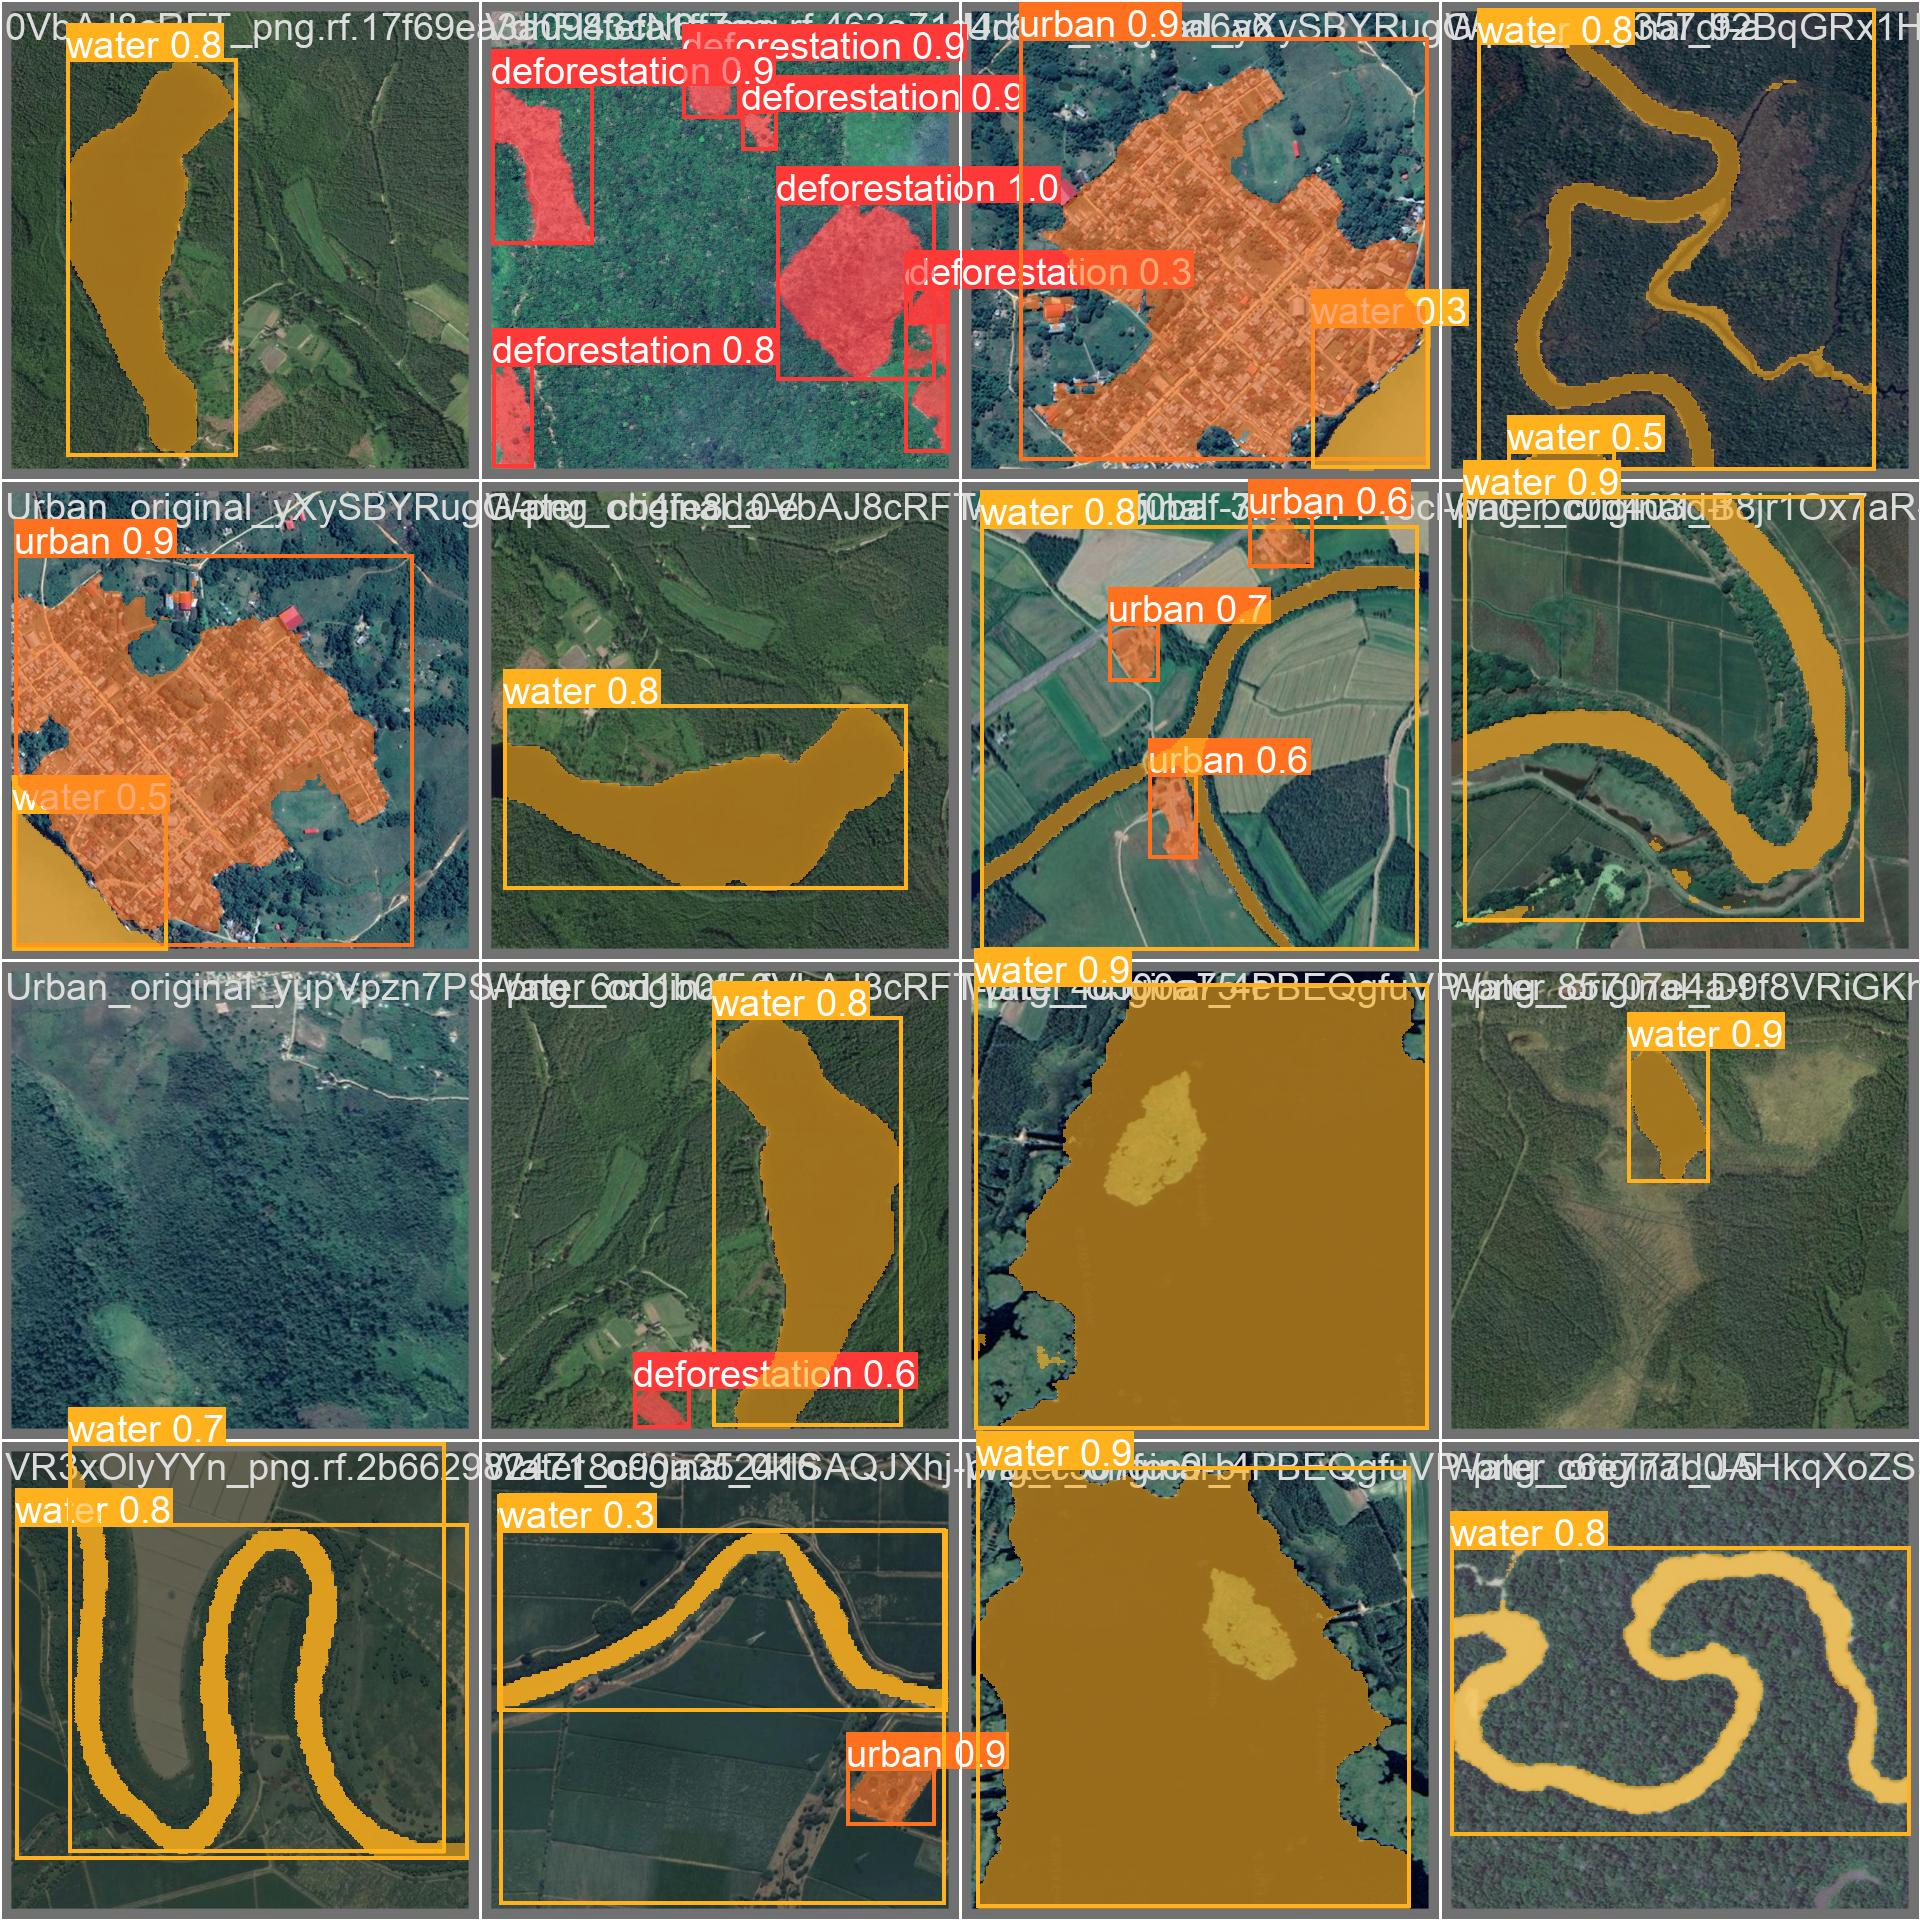

In [ ]:
# Resultado de la predicción en el conjunto de validación
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=640)

In [ ]:
# Renombrar el archivo best.pt
forestgroot = f'{HOME}/runs/segment/train/weights/best.pt'
version_yolo = glob.glob("/content/*-seg.pt")[0].split('yolov')[-1].split('-')[0]
os.rename(forestgroot, os.path.join(os.path.dirname(forestgroot), f"forestgroot_yolov{version_yolo}_seg.pt"))

In [ ]:
forestgroot = os.path.join(os.path.dirname(forestgroot), f"forestgroot_yolov{version_yolo}_seg.pt")
model = YOLO(forestgroot)  # Cargar modelo entrenado

In [ ]:
# Validar el modelo
validation_results = model.val()

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/datasets/Groot-V2-3/valid/labels.cache... 166 images, 1 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/11 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.07it/s]


                   all        166        415      0.785      0.703      0.771      0.609      0.789      0.708      0.775      0.573
         deforestation        166        106      0.766      0.698      0.742      0.659      0.754      0.689       0.74      0.616
                  fire        166        100      0.805        0.7        0.8      0.675      0.816      0.712      0.807      0.645
                 urban        166         93      0.747      0.688      0.762      0.492      0.756      0.701      0.771      0.449
                 water        166        116      0.823      0.724       0.78      0.611      0.831      0.733      0.782      0.579
Speed: 1.1ms preprocess, 16.7ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/segment/val


Después de validar el modelo **forestgroot_yolov8n_seg.pt**, se pueden observar varias métricas importantes que proporcionan información sobre su desempeño en la segmentación de instancias:

- **Precisión (P) y Recall (R)**: Estas métricas indican qué tan precisas y completas son las segmentaciones realizadas por el modelo. Una alta precisión significa que la mayoría de las segmentaciones son correctas, mientras que una alta recall indica que el modelo es capaz de segmentar la mayoría de los objetos presentes en las imágenes.

- **mAP50 y mAP50-95**: Estas métricas representan el promedio del área bajo la curva de precisión-recall (AP) sobre todas las clases, calculado a diferentes umbrales de confianza (50% y 50-95%, respectivamente). Un alto mAP indica un buen rendimiento general del modelo en la segmentación de instancias.



El modelo **forestgroot_yolov8n_seg.pt** exhibe un sólido desempeño en la segmentación de instancias, destacándose especialmente en la clase de deforestación. Sin embargo, aunque logra altas puntuaciones de precisión y cobertura en la detección de deforestación y fuego, se observa un rendimiento algo más bajo en la segmentación de áreas urbanas y cuerpos de agua. Esto sugiere que el modelo podría beneficiarse de mejoras adicionales en la identificación de estas clases secundarias.



## **Detección de Deforestación**

En el ámbito del aprendizaje automático y la visión por computadora, el proceso de interpretar datos visuales se conoce como "inferencia" o "predicción". En esta etapa, se aplicará el modelo entrenado a nuevos datos. A continuación, se presentan algunos parámetros clave que se pueden ajustar para influir en el proceso de inferencia:

| Parámetro | Descripción                                                                                                                                                           |
|-----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| conf      | Establece el umbral mínimo de confianza para las detecciones. Los objetos detectados con una confianza por debajo de este umbral serán descartados. Ajustar este valor puede ayudar a reducir los falsos positivos. |
| source    | Especifica la fuente de datos para la inferencia. Puede ser la ruta de una imagen, un archivo de video, un directorio, una URL o el ID de dispositivo para transmisiones en vivo. Esto permite una aplicación flexible en una variedad de formatos y fuentes de entrada. |
| save      | Permite guardar las imágenes o videos anotados en archivo. Esto resulta útil para documentación, análisis adicional o compartir resultados.                                              |


In [ ]:
# Ejecutar la tarea de segmentación
results = model(source=f'{dataset.location}/test/images', conf=0.25, save=True)


image 1/83 /content/datasets/Groot-V2-3/test/images/30SLNiqUJi_png.rf.5079e61e306910a9b5d1b08361032d66.jpg: 640x640 3 waters, 23.6ms
image 2/83 /content/datasets/Groot-V2-3/test/images/3SSl6jQL1C_png.rf.5113257755500cc83c31fc7f09c27717.jpg: 640x640 17 deforestations, 22.3ms
image 3/83 /content/datasets/Groot-V2-3/test/images/4Xhm8KyQsW_png.rf.f9b45772978d1bfacfb3e6919cb514af.jpg: 640x640 10 deforestations, 23.0ms
image 4/83 /content/datasets/Groot-V2-3/test/images/7B0VYAEhxs_png.rf.35b533d0d01208eae44d9e3fd1b1e4fa.jpg: 640x640 1 deforestation, 2 fires, 19.2ms
image 5/83 /content/datasets/Groot-V2-3/test/images/8JAm5pdIVZ_png.rf.1c28b9f2076f853f2a47786a63b728c2.jpg: 640x640 10 deforestations, 12 fires, 19.0ms
image 6/83 /content/datasets/Groot-V2-3/test/images/Ak0GcQDMvx_png.rf.7c73771b843e4b10e07645928f84d885.jpg: 640x640 2 deforestations, 2 fires, 18.6ms
image 7/83 /content/datasets/Groot-V2-3/test/images/BgG4ekun2F_png.rf.3d8bbdc872ebf242500b9f4bc7d17104.jpg: 640x640 1 water, 19.4ms

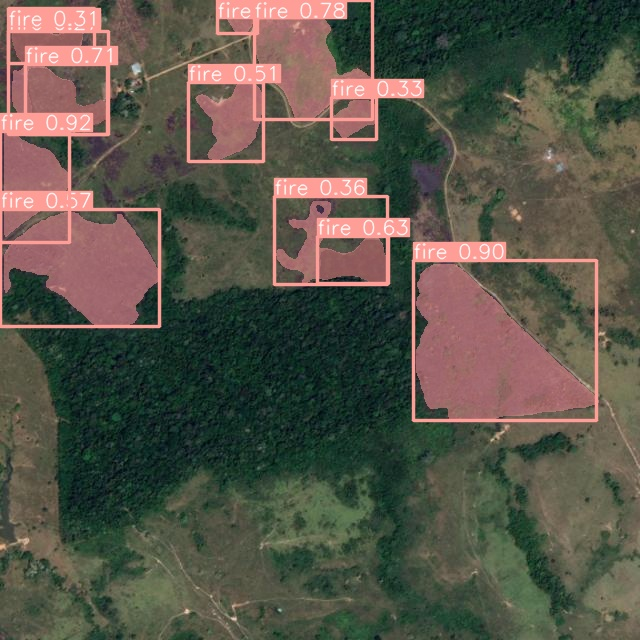

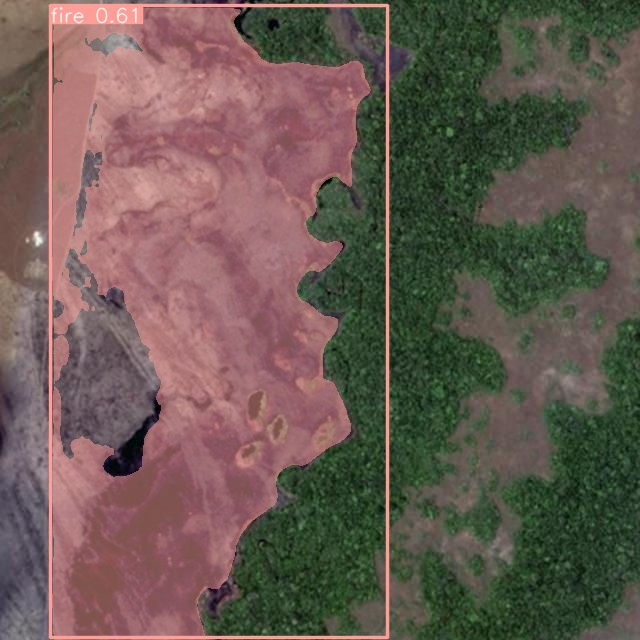

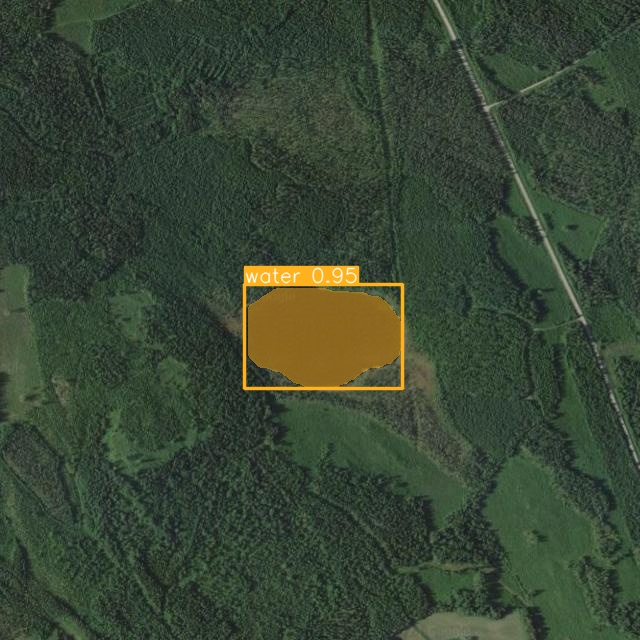

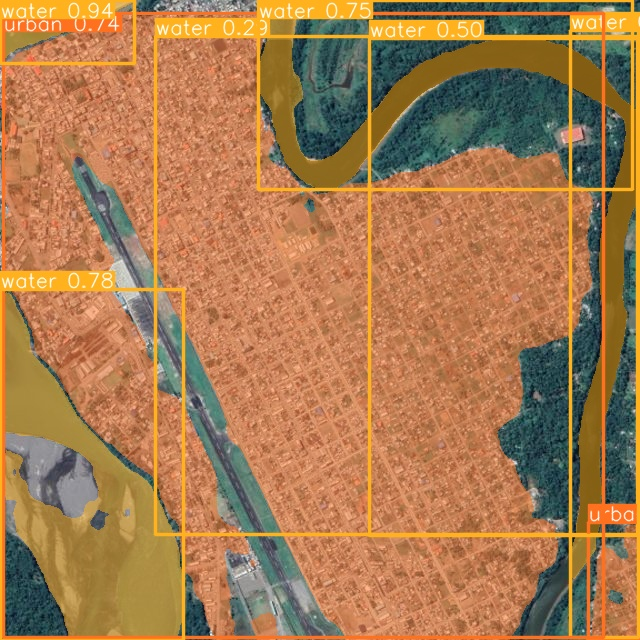

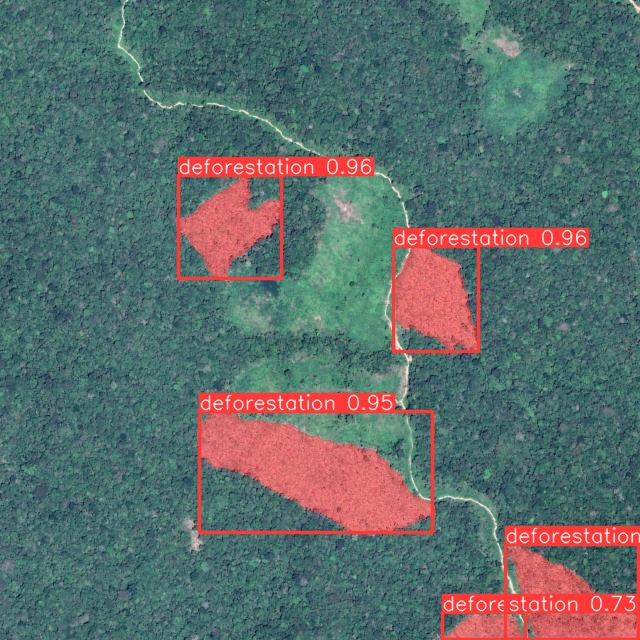

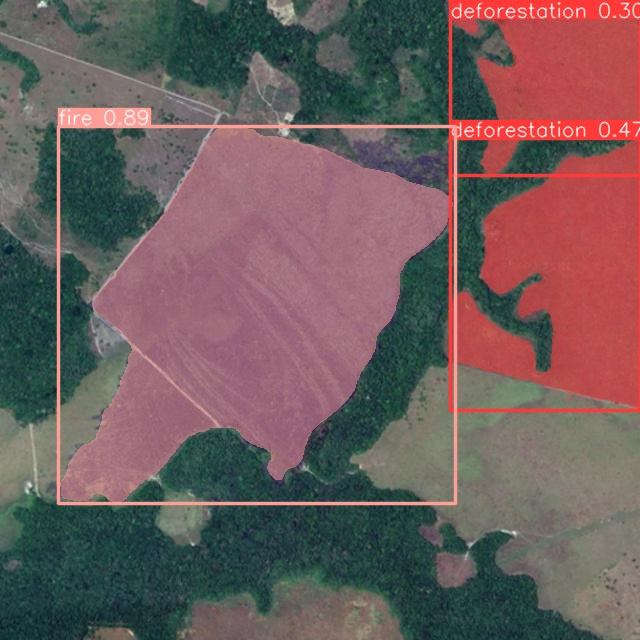

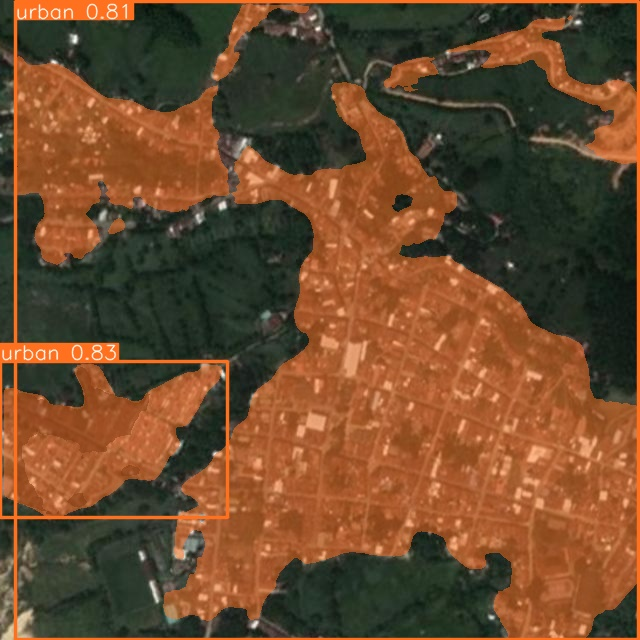

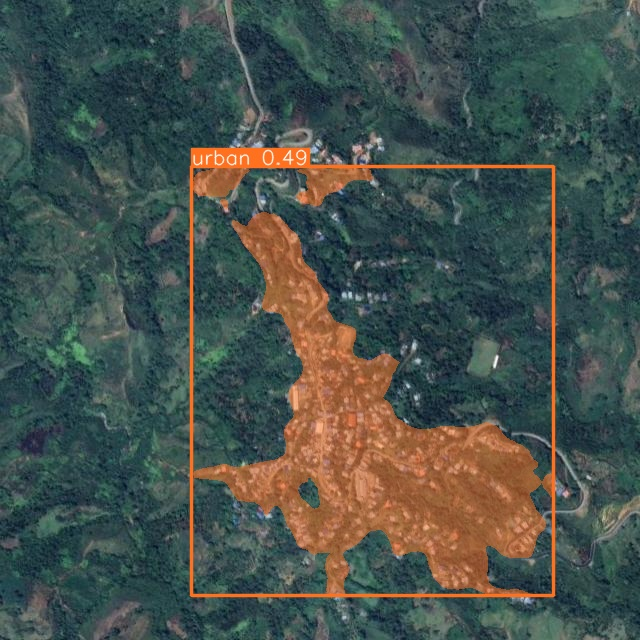

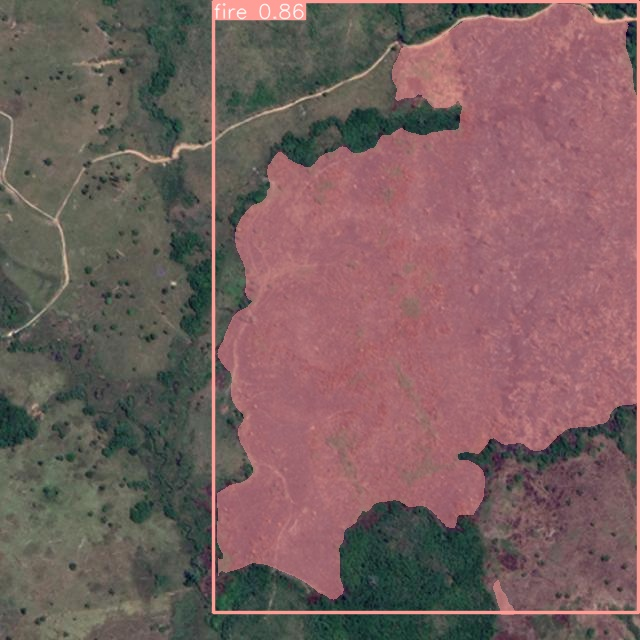

In [ ]:
# Mostrar imágenes predichas durante el entrenamiento
for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:9]:
      display(Image(filename=image_path, width=640))
      print("\n")

## **Exportar Modelo**

In [ ]:
# Exportar el modelo
model.export()

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.30GHz)

PyTorch: starting from '/content/runs/segment/train/weights/forestgroot_yolov8n_seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 40, 8400), (1, 32, 160, 160)) (6.5 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 4.6s, saved as '/content/runs/segment/train/weights/forestgroot_yolov8n_seg.torchscript' (13.0 MB)

Export complete (6.9s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train/weights/forestgroot_yolov8n_seg.torchscript imgsz=640  
Validate:        yolo val task=segment model=/content/runs/segment/train/weights/forestgroot_yolov8n_seg.torchscript imgsz=640 data=/content/datasets/Groot-V2-3/data.yaml  
Visualize:       https://netron.app


'/content/runs/segment/train/weights/forestgroot_yolov8n_seg.torchscript'

## **forestgroot-seg**

In [ ]:
# Carga del modelo exportado para segmentación
forestgroot_seg = YOLO(forestgroot)

# Definición de la ruta del archivo de imagen
source = '/content/datasets/Groot-V2-3/valid/images/0VbAJ8cRFT_png.rf.17f69ea3a098fefa1ff7ee1e3ebb793e.jpg'

# Ejecución de inferencia en la imagen de origen utilizando el modelo exportado
forestgroot_seg.predict(source, save=True, imgsz=320, conf=0.5)


image 1/1 /content/datasets/Groot-V2-3/valid/images/0VbAJ8cRFT_png.rf.17f69ea3a098fefa1ff7ee1e3ebb793e.jpg: 320x320 1 water, 14.4ms
Speed: 1.2ms preprocess, 14.4ms inference, 5.2ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/segment/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'deforestation', 1: 'fire', 2: 'urban', 3: 'water'}
 obb: None
 orig_img: array([[[ 59,  67,  57],
         [ 71,  79,  69],
         [ 70,  78,  68],
         ...,
         [ 58,  68,  52],
         [ 59,  66,  53],
         [ 57,  64,  51]],
 
        [[ 54,  62,  52],
         [ 78,  86,  76],
         [ 76,  84,  74],
         ...,
         [ 61,  71,  55],
         [ 68,  75,  62],
         [ 60,  67,  54]],
 
        [[ 31,  39,  29],
         [ 70,  78,  68],
         [ 82,  90,  80],
         ...,
         [ 65,  75,  59],
         [ 78,  87,  74],
         [ 68,  77,  64]],
 
        ...,
 
        [[ 61,  81,  62],
         [ 80, 100,  81],
         [ 85, 105,  86],
         ...,
         [ 66,  88,  69],
         [ 70,  97,  77],
         [ 59,  87,  67]],
 
        [[ 57,  77,  58],
       

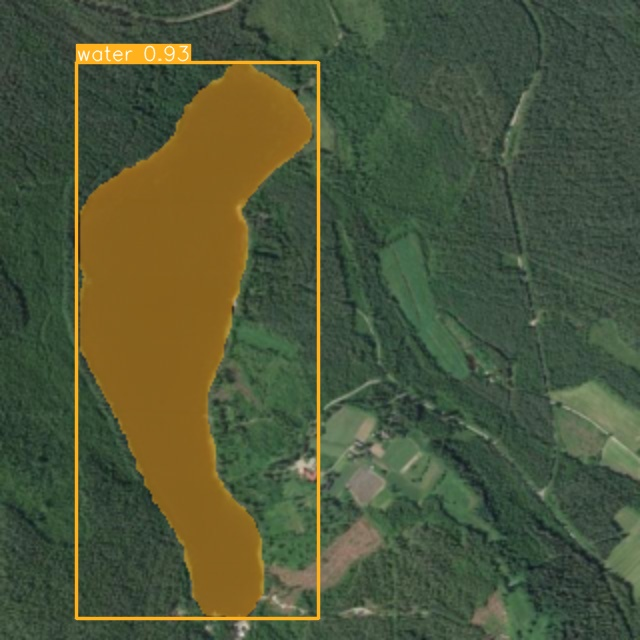

In [ ]:
# Mostrar la imagen segmentada después de la inferencia
Image(filename='runs/segment/predict2/0VbAJ8cRFT_png.rf.17f69ea3a098fefa1ff7ee1e3ebb793e.jpg', height=640)